+ 予測をone-hotに変更する：○
+ 前日との比率もとる
+ 最大値、最小値との差分をとる

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
% matplotlib inline


input_folder = "./input/"

df = pd.read_csv(input_folder+"EURUSD_M1_201706_with_signal.csv")

In [2]:
df

,datetime,datetime.1,o,h,l,c,v,signal
0,2017-06-01 00:00:00,2017-06-01 00:00:00,1.12467,1.12467,1.12457,1.12457,0,0
1,2017-06-01 00:01:00,2017-06-01 00:01:00,1.12456,1.12465,1.12456,1.12462,0,0
2,2017-06-01 00:02:00,2017-06-01 00:02:00,1.12464,1.12464,1.12456,1.12456,0,0
3,2017-06-01 00:03:00,2017-06-01 00:03:00,1.12455,1.12455,1.12450,1.12450,0,0
4,2017-06-01 00:04:00,2017-06-01 00:04:00,1.12450,1.12450,1.12450,1.12450,0,0
5,2017-06-01 00:05:00,2017-06-01 00:05:00,1.12450,1.12450,1.12450,1.12450,0,0
6,2017-06-01 00:06:00,2017-06-01 00:06:00,1.12450,1.12450,1.12444,1.12450,0,0
7,2017-06-01 00:07:00,2017-06-01 00:07:00,1.12450,1.12451,1.12445,1.12450,0,0
8,2017-06-01 00:08:00,2017-06-01 00:08:00,1.12444,1.12450,1.12443,1.12444,0,0
9,2017-06-01 00:09:00,2017-06-01 00:09:00,1.12444,1.12444,1.12438,1.12438,0,0


In [3]:
df.describe()

,o,h,l,c,v,signal
count,31194.000000,31194.000000,31194.000000,31194.000000,31194.0,31194.000000
mean,1.123191,1.123260,1.123123,1.123190,0.0,0.023594
std,0.007864,0.007873,0.007856,0.007865,0.0,0.367754
min,1.111940,1.111960,1.111870,1.111910,0.0,-1.000000
25%,1.117973,1.118030,1.117900,1.117970,0.0,0.000000
50%,1.120960,1.121030,1.120900,1.120965,0.0,0.000000
75%,1.126490,1.126550,1.126427,1.126490,0.0,0.000000
max,1.144500,1.144530,1.144450,1.144500,0.0,1.000000


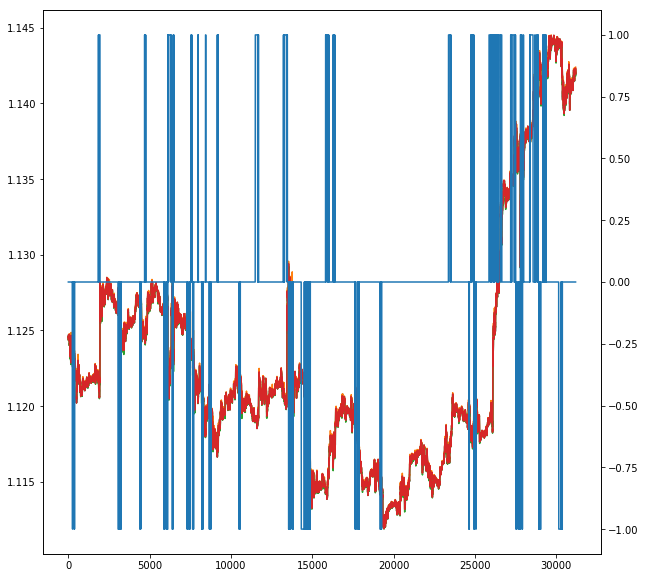

In [4]:
fig,ax1 = plt.subplots(figsize=(10,10))
ax1.plot(df[["o","h","l","c"]])
ax2 = ax1.twinx()
ax2.plot(df["signal"])

# LSTM

https://github.com/yusugomori/deeplearning-tensorflow-keras/blob/master/5/tensorflow/01_00_sin_simple_lstm_tensorflow.r1.2.py

In [5]:
np.random.seed(0)
tf.set_random_seed(1234)

In [6]:
def inference(x, n_batch, maxlen=None, n_hidden=None, n_out=None):
    def weight_variable(shape):
        initial = tf.truncated_normal(shape, stddev=0.01)
        return tf.Variable(initial)

    def bias_variable(shape):
        initial = tf.zeros(shape, dtype=tf.float32)
        return tf.Variable(initial)

    cell = tf.contrib.rnn.BasicLSTMCell(n_hidden, forget_bias=1.0)
    initial_state = cell.zero_state(n_batch, tf.float32)

    state = initial_state
    outputs = []  # 過去の隠れ層の出力を保存
    with tf.variable_scope('LSTM'):
        for t in range(maxlen):
            if t > 0:
                tf.get_variable_scope().reuse_variables()
            (cell_output, state) = cell(x[:, t, :], state)
            outputs.append(cell_output)

    output = outputs[-1]

    V = weight_variable([n_hidden, n_out])
    c = bias_variable([n_out])
#     y = tf.matmul(output, V) + c  # 線形活性
    # softmax
    y = tf.nn.softmax(tf.matmul(output, V) + c)
    

    return y

In [7]:
def loss(y, t):
#     mse = tf.reduce_mean(tf.square(y - t))
#     return mse
    cross_entropy = \
    tf.reduce_mean(-tf.reduce_sum(
                   t * tf.log(tf.clip_by_value(y, 1e-10, 1.0)),
                   reduction_indices=[1]))
    return cross_entropy


def training(loss):
    optimizer = \
        tf.train.AdamOptimizer(learning_rate=0.1, beta1=0.9, beta2=0.999)

    train_step = optimizer.minimize(loss)
    return train_step

In [8]:
class EarlyStopping():
    def __init__(self, patience=0, verbose=0):
        self._step = 0
        self._loss = float('inf')
        self.patience = patience
        self.verbose = verbose

    def validate(self, loss):
        if self._loss < loss:
            self._step += 1
            if self._step > self.patience:
                if self.verbose:
                    print('early stopping')
                return True
        else:
            self._step = 0
            self._loss = loss

        return False

# 学習

In [9]:
len(range(100))

100

In [10]:
df.shape
length_of_sequences = df.shape[0]

In [11]:
length_of_sequences

31194

In [12]:
# np.arrayに変更
f = np.array(df[df.columns[[2,3,4,5,7]]])

In [13]:
# データの生成
# 学習に用いる長さ(要調整)
maxlen = 100

data = []
target = []
for i in range(0,length_of_sequences - maxlen):
    data.append(f[i:i+maxlen,0:4])
    target.append(f[i+maxlen,4])

In [14]:
X = np.array(data).reshape(len(data), maxlen, 4)
# 
y = np.array(target)
Y = np.eye(3)[y.astype(int)]
# Y = np.array(target).reshape(len(data), 1)

In [15]:
# サンプル数の設定
N_train = int(len(data)*0.9)
N_validation = len(data) - N_train

X_train, X_validation, Y_train, Y_validation = \
    train_test_split(X, Y, test_size=N_validation)

In [16]:
# モデル設定
n_in = len(X[0][0])  # 4
n_hidden = 30
n_out = len(Y[0])  # 3

x = tf.placeholder(tf.float32, shape=[None, maxlen, n_in])
t = tf.placeholder(tf.float32, shape=[None, n_out])
n_batch = tf.placeholder(tf.int32, shape=[])

y = inference(x, n_batch, maxlen=maxlen, n_hidden=n_hidden, n_out=n_out)
loss = loss(y, t)
train_step = training(loss)

early_stopping = EarlyStopping(patience=10, verbose=1)
history = {
    'val_loss': []
}

In [17]:
# モデル学習
epochs = 30
batch_size = 10

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

n_batches = N_train // batch_size

for epoch in range(epochs):
    X_, Y_ = shuffle(X_train,Y_train)
    
    for i in range(n_batches):
        start = i * batch_size
        end = start + batch_size
        
        sess.run(train_step, feed_dict={
            x: X_[start:end],
            t: Y_[start:end],
            n_batch: batch_size
        })
        
    val_loss = loss.eval(session=sess, feed_dict={
        x: X_validation,
        t: Y_validation,
        n_batch: N_validation
    })
    
    history['val_loss'].append(val_loss)
    print('epoch:',epoch,
         ' validation loss:',val_loss)
    
    # early stopping チェック
    if early_stopping.validate(val_loss):
        break
    

epoch: 0  validation loss: 0.540458
epoch: 1  validation loss: 0.521417
epoch: 2  validation loss: 0.511974
epoch: 3  validation loss: 0.533716
epoch: 4  validation loss: 0.514056
epoch: 5  validation loss: 0.51315
epoch: 6  validation loss: 0.511654
epoch: 7  validation loss: 0.515287
epoch: 8  validation loss: 0.524489
epoch: 9  validation loss: 0.522695
epoch: 10  validation loss: 0.536573
epoch: 11  validation loss: 0.519558
epoch: 12  validation loss: 0.521145
epoch: 13  validation loss: 0.511753
epoch: 14  validation loss: 0.522614
epoch: 15  validation loss: 0.515162
epoch: 16  validation loss: 0.522956
epoch: 17  validation loss: 0.533977
early stopping


### 可視化

In [18]:
# 出力を用いて予測
truncate = maxlen
Z = X

# 元データのo,h,l,cだけ持ってくる
original = [f[i,:-1] for i in range(maxlen)]
predicted = [None for i in range(maxlen)]

# labelは下記
labels = [0,1,-1]

for i in range(length_of_sequences - maxlen):
    # 最後の時系列データから未来を予測
#     z_ = Z[-1:]
    z_ = [Z[i]]
    y_ = y.eval(session=sess,feed_dict={
        x: z_,
        n_batch: 1
    })
    
#     sequence_ = np.concatenate((z_.reshape(maxlen, n_in)[1:], y_),axis=0).reshape(1, maxlen, n_in)
#     Z = np.append(Z, sequence_, axis=0)
    if i % 1000==0:
        print(i)
#     predicted.append(y_.reshape(-1))
    predicted.append(labels[np.argmax(y_)])

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000


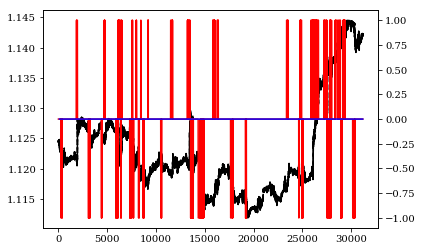

In [19]:
# グラフで可視化
plt.rc('font', family='serif')
fig,ax1 = plt.subplots()
# ax1.ylim([-1.5, 1.5])
# plt.plot(toy_problem(T, ampl=0), linestyle='dotted', color='#aaaaaa')
ax1.plot(f[:,:-1], linestyle='dashed', color='black')
ax2 = ax1.twinx()
ax2.plot(f[:,-1],color="red")
ax2.plot(predicted, color='blue')
plt.show()

In [20]:
set(predicted)

{0, None}